<a href="https://colab.research.google.com/github/jpoist97/lab-2-phase-2-sfwathen/blob/main/DATA_301_Lab_2B_Evidence_of_Discrimination%3F_Justin_Poist%2C_Sam_Wathen%2C_Zoe_Atkins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

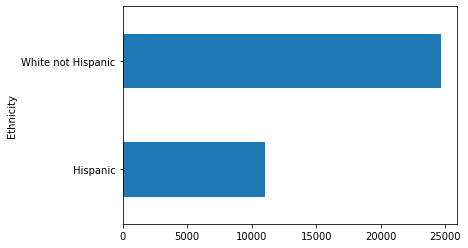

In [1]:
import pandas as pd
df_dds = pd.read_csv("https://dlsun.github.io/pods/data/ca_dds_expenditures.csv")
df_dds_white_or_hispanic = df_dds[(df_dds["Ethnicity"] == "White not Hispanic") | (df_dds["Ethnicity"] == "Hispanic")]

df_dds_white_or_hispanic.groupby("Ethnicity")["Expenditures"].mean().plot.barh()

As we can see from the graphic above, the DDS spends on average about twice as much on White inidivduals as it does on Hispanic individuals.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

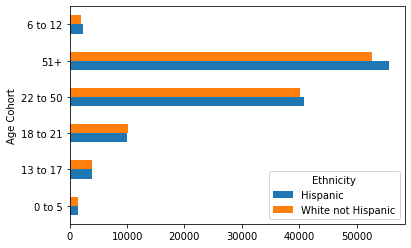

In [2]:
ethnicity_cohort_mean_exp = df_dds_white_or_hispanic.groupby(["Ethnicity", "Age Cohort"])["Expenditures"].mean()
df_ehtnicity_cohort = ethnicity_cohort_mean_exp.to_frame()
# Referenced https://medium.com/analytics-vidhya/create-a-grouped-bar-chart-with-matplotlib-and-pandas-9b021c97e0a
df_ehtnicity_cohort.pivot_table(index="Age Cohort", columns="Ethnicity", values="Expenditures").plot.barh()

When we calculate the average expenditure broken down into ethnicity and age cohorts we see the opposite picture from the previous question. Rather than White indiviuals receiving more benefits, we see that for each age cohort the average expenditure is slightly higher for Hispanic individuals rather than White individuals.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

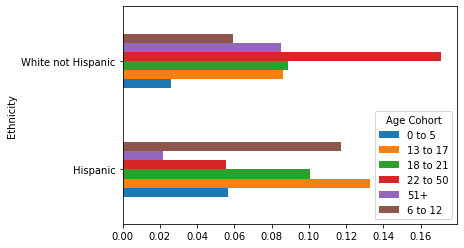

In [3]:
df_ethnicity_age = pd.crosstab(df_dds_white_or_hispanic["Ethnicity"], df_dds_white_or_hispanic["Age Cohort"], normalize=True)
df_ethnicity_age.plot.barh()

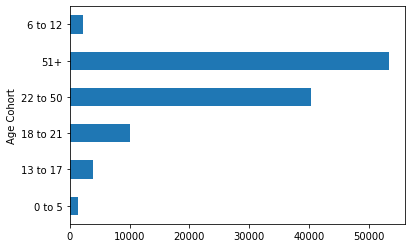

In [4]:
df_dds_white_or_hispanic.groupby("Age Cohort")["Expenditures"].mean().plot.barh()

The reason we see this discrepancy between our first and second analysis is a case of Simpson's Paradox. Essentially what is going on here is the Age Cohort an individual is put into can have a really big effect on the expenditure for that individual. As we see in the second graph above, the 22 to 50 and 51+ age cohorts have the largest average expenditure, while the other age cohorts have far smaller average expenditure. This leads to the discrepancy we see between our first and second analysis because in our first analysis we do not account for the effect Age Cohort has on our expenditure. Looking at the first graph above, we can see that White individuals have much higer percentages of individuals in the 22 to 50 and 51+ age cohorts. This artificially increases the total mean expenditure for white individuals when we don't account for the fact that individuals in those age cohorts have much higher expenditure on average. This is why in our second analysis when we account for age cohort, we find that the DDS actually spends slightly more on average on hispanic individuals than white individuals.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.